In [3]:
#dataset
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

--2025-02-05 04:24:15--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  18.9MB/s    in 0.3s    

2025-02-05 04:24:16 (18.9 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [5]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
x = df.iloc[0]
x

,0
budget,237000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/
id,19995
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
original_language,en
original_title,Avatar
overview,"In the 22nd century, a paraplegic Marine is di..."
popularity,150.437577
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289..."


In [7]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [8]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [11]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [12]:
' '.join(' '.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy Science Fiction'

In [15]:
def keywords_and_genres_toString(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(j['name'].replace(" ", "") for j in genres)

    keywords = json.loads(row['keywords'])
    keywords = ' '.join(j['name'].replace(" ", "") for j in keywords)

    return f"{genres} {keywords}"


In [16]:
df['string'] = df.apply(keywords_and_genres_toString, axis=1)
df['string']

,string
0,Action Adventure Fantasy ScienceFiction cultur...
1,Adventure Fantasy Action ocean drugabuse exoti...
2,Action Adventure Crime spy basedonnovel secret...
3,Action Crime Drama Thriller dccomics crimefigh...
4,Action Adventure ScienceFiction basedonnovel m...
...,...
4798,Action Crime Thriller unitedstates–mexicobarri...
4799,Comedy Romance
4800,Comedy Drama Romance TVMovie date loveatfirsts...
4801,


In [17]:
tfidf = TfidfVectorizer(max_features = 2000)

In [19]:
X = tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [20]:
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

,0
title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


In [22]:
idx = movie2idx['The Dark Knight Rises']
idx

3

In [23]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [24]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [25]:
scores = cosine_similarity(query, X)
scores

array([[0.00768273, 0.00805982, 0.03901032, ..., 0.00709045, 0.        ,
        0.        ]])

In [26]:
scores = scores.flatten()

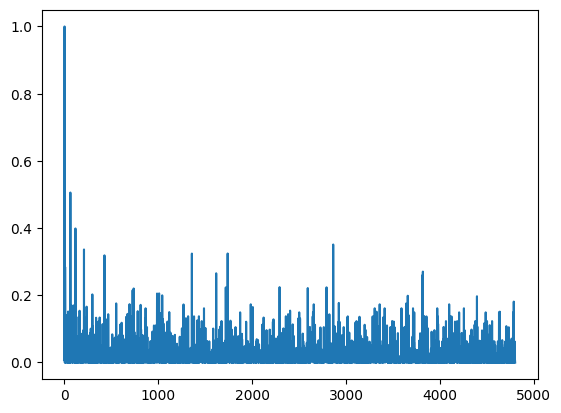

In [27]:
plt.plot(scores)

In [28]:
(-scores).argsort()

array([   3,   65,  119, ..., 3720, 3754, 4802])

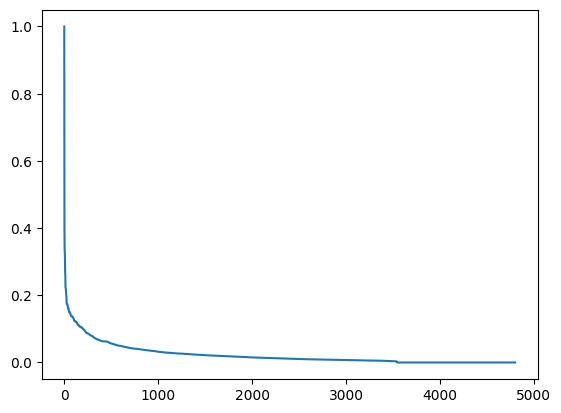

In [29]:
plt.plot(scores[(-scores).argsort()])

In [30]:
recommended_idx = (-scores).argsort()[1:6]

In [31]:
df['title'].iloc[recommended_idx]

,title
65,The Dark Knight
119,Batman Begins
2864,Arbitrage
210,Batman & Robin
1740,Kick-Ass 2


In [32]:
def recommend(title):
  idx = movie2idx[title]
  if type(idx) == pd.Series:
    idx = idx.iloc[0]
  query = X[idx]
  scores = cosine_similarity(query, X)

  scores = scores.flatten()
  recommended_idx = (-scores).argsort()[1:6]
  return df['title'].iloc[recommended_idx]

In [33]:
print("Recommendations for 'The Dark Knight Rises'")
print(recommend('The Dark Knight Rises'))

Recommendations for 'The Dark Knight Rises'
65      The Dark Knight
119       Batman Begins
2864          Arbitrage
210      Batman & Robin
1740         Kick-Ass 2
Name: title, dtype: object


In [36]:
print("Recommendations for 'Tangled'")
print(recommend('Tangled'))

Recommendations for 'Tangled'
269     The Princess and the Frog
874                     Anastasia
1695                      Aladdin
391                     Enchanted
3038        Hey Arnold! The Movie
Name: title, dtype: object


In [38]:
print("Recommendations for 'Harry Potter and the Philosopher's Stone'")
print(recommend('Harry Potter and the Philosopher\'s Stone'))

Recommendations for 'Harry Potter and the Philosopher's Stone'
276      Harry Potter and the Chamber of Secrets
113    Harry Potter and the Order of the Phoenix
191     Harry Potter and the Prisoner of Azkaban
331                                  Seventh Son
8         Harry Potter and the Half-Blood Prince
Name: title, dtype: object
